# **1. 프로젝트 주제**

### 다음 분기에 설계해야할 비디오게임에 대한 EDA Project

# **2. 데이터불러오기, Library import**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

from scipy.stats import boxcox
from scipy import stats

In [2]:
# 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv', index_col=0)       
df

Name Platform    Year  \
1                        Candace Kane's Candy Factory       DS  2008.0   
2                                      The Munchables      Wii  2009.0   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
4                    Deal or No Deal: Special Edition       DS  2010.0   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16594                         Ice Age 2: The Meltdown       GC  2006.0   
16595                     Rainbow Islands: Revolution      PSP  2005.0   
16596                                        NBA 2K16      PS3  2015.0   
16597                     Toukiden: The Age of Demons      PSV  2013.0   
16598                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
1         Action                    Destineer     0.04        0        0   
2         Action           Namco Bandai Games     0.17        0        0   
3      Adventure                    Alchemist        0        0     0.02   
4           Misc                    Zoo Games     0.04        0        0   
5       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16594   Platform                Vivendi Games     0.15     0.04        0   
16595     Action            Rising Star Games     0.01        0        0   
16596     Sports         Take-Two Interactive     0.44     0.19     0.03   
16597     Action                   Tecmo Koei     0.05     0.05     0.25   
16598   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
1               0  
2            0.01  
3               0  
4               0  
5            0.04  
...           ...  
16594        0.01  
16595           0  
16596        0.13  
16597        0.03  
16598        0.01  

[16598 rows x 9 columns]

# **3. EDA, Data Preprocessing**

## 1) 결측치제거

In [3]:
# 각 행별로 N/A값은 공란으로 만든 후
df = df.replace('N/A','')

In [4]:
# 결측치가 몇개인지 파악한 후
pd.isnull(df).sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
# 16598개의 데이터 갯수에 비하면 적은 수치임을 파악하고 결측치있는 행 제거
df = df.dropna(axis=0)
df

# https://rfriend.tistory.com/263

Name Platform    Year  \
1                        Candace Kane's Candy Factory       DS  2008.0   
2                                      The Munchables      Wii  2009.0   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010.0   
4                    Deal or No Deal: Special Edition       DS  2010.0   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010.0   
...                                               ...      ...     ...   
16594                         Ice Age 2: The Meltdown       GC  2006.0   
16595                     Rainbow Islands: Revolution      PSP  2005.0   
16596                                        NBA 2K16      PS3  2015.0   
16597                     Toukiden: The Age of Demons      PSV  2013.0   
16598                        The King of Fighters '95       PS  1996.0   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
1         Action                    Destineer     0.04        0        0   
2         Action           Namco Bandai Games     0.17        0        0   
3      Adventure                    Alchemist        0        0     0.02   
4           Misc                    Zoo Games     0.04        0        0   
5       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16594   Platform                Vivendi Games     0.15     0.04        0   
16595     Action            Rising Star Games     0.01        0        0   
16596     Sports         Take-Two Interactive     0.44     0.19     0.03   
16597     Action                   Tecmo Koei     0.05     0.05     0.25   
16598   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
1               0  
2            0.01  
3               0  
4               0  
5            0.04  
...           ...  
16594        0.01  
16595           0  
16596        0.13  
16597        0.03  
16598        0.01  

[16241 rows x 9 columns]

## 2) Data type 변경

In [6]:
# 데이터 type 파악 후,
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [7]:
# Year 컬럼의 종류 확인 후,
df['Year'].sort_values()

9277        0.0
16395       0.0
14667       0.0
2250        1.0
8682        1.0
          ...  
1787     2016.0
10108    2017.0
5311     2017.0
15234    2017.0
6907     2020.0
Name: Year, Length: 16241, dtype: float64

In [8]:
# df['Year'] 4자릿수로 만들기.
def digit_int_4(number):
    if number in range(0,20):
        return int(number+2000)

    elif number in range(86, 100):
        return int(number+1900)
    
    else:
        return int(number)
    
df['Year']=df['Year'].apply(digit_int_4)

# type 바뀌었나 확인
print(df['Year'].info())
df

<class 'pandas.core.series.Series'>
Int64Index: 16241 entries, 1 to 16598
Series name: Year
Non-Null Count  Dtype
--------------  -----
16241 non-null  int64
dtypes: int64(1)
memory usage: 253.8 KB
None


Name Platform  Year  \
1                        Candace Kane's Candy Factory       DS  2008   
2                                      The Munchables      Wii  2009   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
4                    Deal or No Deal: Special Edition       DS  2010   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16594                         Ice Age 2: The Meltdown       GC  2006   
16595                     Rainbow Islands: Revolution      PSP  2005   
16596                                        NBA 2K16      PS3  2015   
16597                     Toukiden: The Age of Demons      PSV  2013   
16598                        The King of Fighters '95       PS  1996   

           Genre                    Publisher NA_Sales EU_Sales JP_Sales  \
1         Action                    Destineer     0.04        0        0   
2         Action           Namco Bandai Games     0.17        0        0   
3      Adventure                    Alchemist        0        0     0.02   
4           Misc                    Zoo Games     0.04        0        0   
5       Platform                  D3Publisher     0.12     0.09        0   
...          ...                          ...      ...      ...      ...   
16594   Platform                Vivendi Games     0.15     0.04        0   
16595     Action            Rising Star Games     0.01        0        0   
16596     Sports         Take-Two Interactive     0.44     0.19     0.03   
16597     Action                   Tecmo Koei     0.05     0.05     0.25   
16598   Fighting  Sony Computer Entertainment        0        0     0.16   

      Other_Sales  
1               0  
2            0.01  
3               0  
4               0  
5            0.04  
...           ...  
16594        0.01  
16595           0  
16596        0.13  
16597        0.03  
16598        0.01  

[16241 rows x 9 columns]

## 3) Data 내용정리

In [9]:
# 1.Sales 특성정리
# Sales 특성의 데이터에 수치 외적으로 K,M이 있어 얼마나 들어있는지 확인 후,

print(df['NA_Sales'].str.contains('K|M').sum())
print(df['EU_Sales'].str.contains('K|M').sum())
print(df['JP_Sales'].str.contains('K|M').sum())
print(df['Other_Sales'].str.contains('K|M').sum())

191
195
196
197


In [10]:
# 다음과 같이 삭제하려고 했으나
# drop_values = ['K','M']
# df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
# 삭제할 데이터가 약 800개로 많다고 판단하여 아래와 같은 함수를 만들어 데이터를 정리함

In [11]:
# K->1,000, M->1,000,000으로 변환
# K, M 미표기 데이터는
def sales_scale(value):
    if value[-1] == 'K':
        value = value.replace('K','')
        value = float(value)*0.001
        return value
    elif value[-1] == 'M':
        value = value.replace('M','')
        return value
    else:
        return value

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'].apply(sales_scale))
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'].apply(sales_scale))
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'].apply(sales_scale))
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'].apply(sales_scale))
df

Name Platform  Year  \
1                        Candace Kane's Candy Factory       DS  2008   
2                                      The Munchables      Wii  2009   
3      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
4                    Deal or No Deal: Special Edition       DS  2010   
5           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16594                         Ice Age 2: The Meltdown       GC  2006   
16595                     Rainbow Islands: Revolution      PSP  2005   
16596                                        NBA 2K16      PS3  2015   
16597                     Toukiden: The Age of Demons      PSV  2013   
16598                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
1         Action                    Destineer      0.04      0.00      0.00   
2         Action           Namco Bandai Games      0.17      0.00      0.00   
3      Adventure                    Alchemist      0.00      0.00      0.02   
4           Misc                    Zoo Games      0.04      0.00      0.00   
5       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16594   Platform                Vivendi Games      0.15      0.04      0.00   
16595     Action            Rising Star Games      0.01      0.00      0.00   
16596     Sports         Take-Two Interactive      0.44      0.19      0.03   
16597     Action                   Tecmo Koei      0.05      0.05      0.25   
16598   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  
1             0.00  
2             0.01  
3             0.00  
4             0.00  
5             0.04  
...            ...  
16594         0.01  
16595         0.00  
16596         0.13  
16597         0.03  
16598         0.01  

[16241 rows x 9 columns]

In [12]:
# 2. Total_Sales 특성생성 (4개로 구분된 지역별 출고량 합산)
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [13]:
# 3. Genre 컬럼 data 확인
set(df.Genre)                #df.columns

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [14]:
# '-' -> '_'로 이름 바꿈
df = df.replace('Role-Playing','Role_playing')

In [15]:
# 잘바뀌었는지 확인
set(df.Genre)

{'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role_playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'}

In [16]:
df.head()

Name Platform  Year      Genre  \
1                    Candace Kane's Candy Factory       DS  2008     Action   
2                                  The Munchables      Wii  2009     Action   
3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
4                Deal or No Deal: Special Edition       DS  2010       Misc   
5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
1           Destineer      0.04      0.00      0.00         0.00         0.04  
2  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18  
3           Alchemist      0.00      0.00      0.02         0.00         0.02  
4           Zoo Games      0.04      0.00      0.00         0.00         0.04  
5         D3Publisher      0.12      0.09      0.00         0.04         0.25

In [19]:
# 인덱스 재설정
df = df.reset_index(drop=True)
df

Name Platform  Year  \
0                        Candace Kane's Candy Factory       DS  2008   
1                                      The Munchables      Wii  2009   
2      Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3                    Deal or No Deal: Special Edition       DS  2010   
4           Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   
...                                               ...      ...   ...   
16236                         Ice Age 2: The Meltdown       GC  2006   
16237                     Rainbow Islands: Revolution      PSP  2005   
16238                                        NBA 2K16      PS3  2015   
16239                     Toukiden: The Age of Demons      PSV  2013   
16240                        The King of Fighters '95       PS  1996   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Action                    Destineer      0.04      0.00      0.00   
1         Action           Namco Bandai Games      0.17      0.00      0.00   
2      Adventure                    Alchemist      0.00      0.00      0.02   
3           Misc                    Zoo Games      0.04      0.00      0.00   
4       Platform                  D3Publisher      0.12      0.09      0.00   
...          ...                          ...       ...       ...       ...   
16236   Platform                Vivendi Games      0.15      0.04      0.00   
16237     Action            Rising Star Games      0.01      0.00      0.00   
16238     Sports         Take-Two Interactive      0.44      0.19      0.03   
16239     Action                   Tecmo Koei      0.05      0.05      0.25   
16240   Fighting  Sony Computer Entertainment      0.00      0.00      0.16   

       Other_Sales  Total_Sales  
0             0.00         0.04  
1             0.01         0.18  
2             0.00         0.02  
3             0.00         0.04  
4             0.04         0.25  
...            ...          ...  
16236         0.01         0.20  
16237         0.00         0.01  
16238         0.13         0.79  
16239         0.03         0.38  
16240         0.01         0.17  

[16241 rows x 10 columns]

In [20]:
# 전처리 후 게임이름 기준의 데이터는 기준 몇개인가?

df_by_name_new = df.groupby('Name').NA_Sales.sum()
df_by_name_new

Name
'98 Koshien                                0.15
.hack//G.U. Vol.1//Rebirth                 0.00
.hack//G.U. Vol.2//Reminisce               0.11
.hack//G.U. Vol.2//Reminisce (jp sales)    0.00
.hack//G.U. Vol.3//Redemption              0.00
                                           ... 
thinkSMART FAMILY!                         0.03
thinkSMART: Chess for Kids                 0.01
uDraw Studio                               1.67
uDraw Studio: Instant Artist               0.09
¡Shin Chan Flipa en colores!               0.00
Name: NA_Sales, Length: 11295, dtype: float64

In [21]:
# 결측치여부재확인
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

# **4. 시각화**

## 1) 지역별 선호하는 장르별 게임 비율

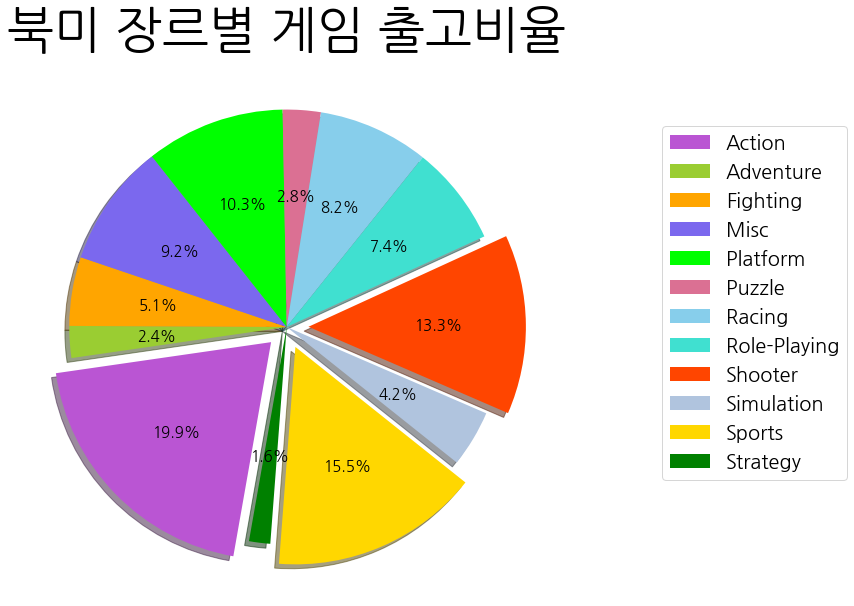

In [22]:
# NA
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']

# https://developer-ankiwoong.tistory.com/229

labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 1. 장르별 북미 출고량
plt.title('북미 장르별 게임 출고비율', size=50, weight='bold')

NA_Sales_by_Genre = df.groupby('Genre').NA_Sales.sum()
ratio_N = NA_Sales_by_Genre

pie = ax.pie(ratio_N, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()
#https://matplotlib.org/1.3.1/api/pyplot_api.html#matplotlib.pyplot.legend

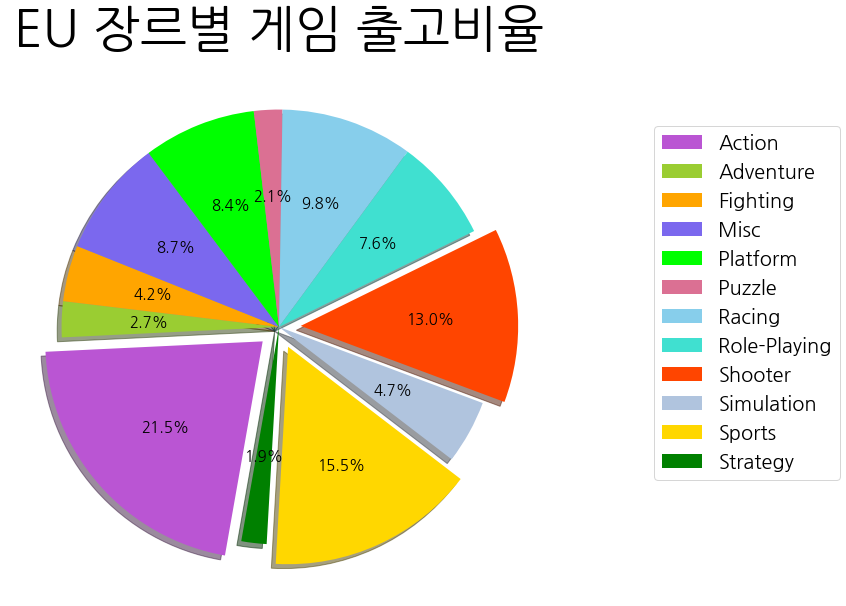

In [23]:
# EU
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']

    
# 2. 장르별 유럽 출고량
plt.title('EU 장르별 게임 출고비율', size=50, weight='bold')

EU_Sales_by_Genre = df.groupby('Genre').EU_Sales.sum()
ratio_E = EU_Sales_by_Genre

pie = ax.pie(ratio_E, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

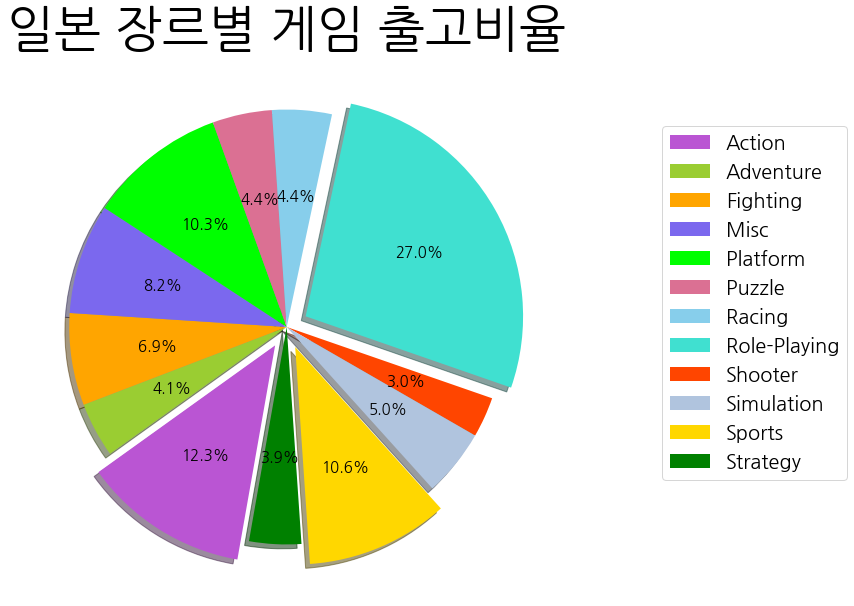

In [24]:
### JAPAN
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 3. 장르별 일본 출고량
plt.title('일본 장르별 게임 출고비율', size=50, weight='bold')

JP_Sales_by_Genre = df.groupby('Genre').JP_Sales.sum()
ratio_J = JP_Sales_by_Genre
explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기

pie = ax.pie(ratio_J, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

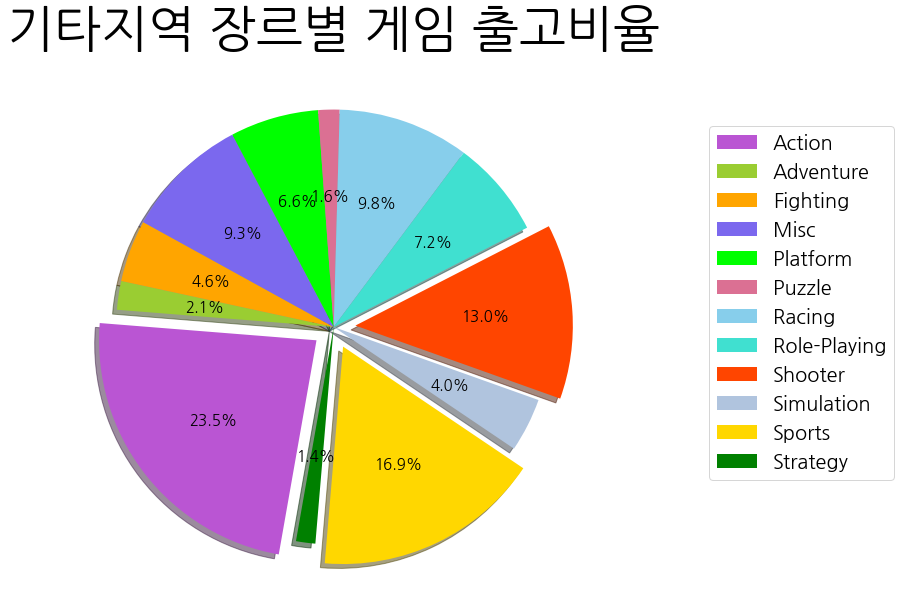

In [25]:
### etc
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15

fig = plt.figure(figsize=(10,10)) ## 캔버스 사이즈 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0]    # 파이차트의 간격 맞추기
mycolors = ['#BA55D3', '#9ACD32', '#FFA500', '#7B68EE', '#00FF00', '#DB7093', '#87CEEB', '#40E0D0', '#FF4500', '#B0C4DE', '#FFD700', '#008000']


labels_by_G = ['Action','Adventure', 'Fighting','Misc','Platform','Puzzle','Racing','Role-Playing', 'Shooter','Simulation', 'Sports', 'Strategy']


# 4. 장르별 타지역 출고량
plt.title('기타지역 장르별 게임 출고비율', size=50, weight='bold')

Other_Sales_by_Genre = df.groupby('Genre').Other_Sales.sum()
ratio_O = Other_Sales_by_Genre

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0]    # 파이차트의 간격 맞추기

pie = ax.pie(ratio_O, colors = mycolors, explode = explode, autopct='%.1f%%', shadow=True, startangle=260, counterclock=False)
# pie의 () 안에 labels = labels_by_G,을 추가하게되면 원에 범주가 같이 나옴
plt.legend(pie[0], labels_by_G, bbox_to_anchor=(1.05, 0.2, 0.5, 0.2), loc='lower right', prop={'size': 20}) # 범례 표시
plt.show()

## 2) 연도별 게임의 트렌드

In [26]:
df.head()

Name Platform  Year      Genre  \
0                    Candace Kane's Candy Factory       DS  2008     Action   
1                                  The Munchables      Wii  2009     Action   
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010  Adventure   
3                Deal or No Deal: Special Edition       DS  2010       Misc   
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   Platform   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
0           Destineer      0.04      0.00      0.00         0.00         0.04  
1  Namco Bandai Games      0.17      0.00      0.00         0.01         0.18  
2           Alchemist      0.00      0.00      0.02         0.00         0.02  
3           Zoo Games      0.04      0.00      0.00         0.00         0.04  
4         D3Publisher      0.12      0.09      0.00         0.04         0.25

In [27]:
# 연도별 장르별 출고량 구분
Total_Yearly_Genre = df.pivot_table(index='Year',columns='Genre',values='Total_Sales', aggfunc = 'sum')
Total_Yearly_Genre

Genre  Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  \
Year                                                                  
1980     0.34        NaN      0.77   2.70       NaN     NaN     NaN   
1981    14.79        NaN       NaN    NaN      6.92    2.25    0.48   
1982     6.50        NaN       NaN   0.87      5.03   10.04    1.57   
1983     2.86       0.40       NaN   2.14      6.93    0.78     NaN   
1984     1.85        NaN       NaN   1.45      0.69    3.14    5.95   
1985     3.52        NaN      1.05    NaN     43.17    3.21     NaN   
1986    13.74        NaN       NaN    NaN      9.39     NaN    1.96   
1987     1.11       4.38      5.42    NaN      1.74     NaN     NaN   
1988     1.74        NaN       NaN    NaN     27.73    5.58    2.14   
1989     4.65        NaN       NaN   1.28     20.66   37.75     NaN   
1990     6.39        NaN       NaN    NaN     22.98    5.99    6.25   
1991     6.76       2.24      0.39   0.08      7.63    3.24    1.14   
1992     3.84      12.24     15.23   4.94     13.41    4.84    9.05   
1993     1.81       0.07      8.75   0.30     18.68    3.17    0.36   
1994     1.55       3.74      8.47   2.86     28.76    1.53    2.18   
1995     3.58       0.71     14.84   6.39     16.69    2.69    6.09   
1996    20.60       4.18     18.04  10.66     28.23    3.92   27.85   
1997    27.59       4.97     11.80   5.68     21.86    5.87   31.92   
1998    39.41       9.04     31.68  11.84     29.83    6.35   26.78   
1999    27.62       7.61     14.31  20.68     20.80    1.34   37.19   
2000    33.89       2.96     20.26  15.55     16.05    3.83   20.00   
2001    56.68       8.96     18.10  16.39     39.33    7.94   55.83   
2002    86.65      11.07     24.92  15.63     45.95    5.33   30.15   
2003    67.98       2.12     23.79  23.79     42.82    1.71   52.18   
2004    76.15       8.45     16.76  26.10     47.34    8.41   45.61   
2005    85.52       8.53     19.68  59.69     22.81   20.26   56.40   
2006    66.49      11.48     22.53  67.23     49.70   10.79   34.06   
2007   105.99      24.44     17.63  91.07     35.53   23.78   38.95   
2008   135.46      24.91     35.41  86.18     35.65   15.53   70.73   
2009   138.32      20.67     32.18  76.90     40.95   20.28   34.09   
2010   117.50      16.57     14.88  88.40     31.98   11.15   34.93   
2011   119.00      15.88     22.11  55.77     28.12    5.10   34.96   
2012   120.78       5.90      9.53  22.93     18.54    1.74   14.43   
2013   125.21       6.61      7.23  25.66     25.09    1.00   13.02   
2014    99.01       6.09     16.15  23.73      8.87    1.50   16.71   
2015    68.25       8.01      7.78  11.66      6.05    0.69    7.92   
2016    19.84       1.79      3.85   1.15      2.08     NaN    1.67   
2017     0.01        NaN       NaN    NaN       NaN     NaN     NaN   
2020      NaN        NaN       NaN    NaN       NaN     NaN     NaN   

Genre  Role_playing  Shooter  Simulation  Sports  Strategy  
Year                                                        
1980            NaN     7.07         NaN     NaN       NaN  
1981            NaN    10.02        0.44    0.78       NaN  
1982            NaN     3.81         NaN    1.06       NaN  
1983            NaN     0.49         NaN    3.20       NaN  
1984            NaN    31.10         NaN    6.17       NaN  
1985            NaN     1.00        0.04    1.96       NaN  
1986           2.52     3.89         NaN    5.58       NaN  
1987           4.65     0.69         NaN    3.71       NaN  
1988           5.88     0.51        0.03    3.60       NaN  
1989           2.20     1.19         NaN    5.72       NaN  
1990           4.52      NaN        1.13    2.11       NaN  
1991           3.26     1.99        2.15    2.41      0.94  
1992           6.86     0.28        2.14    2.95      0.36  
1993           5.59     3.08        0.19    3.18      0.81  
1994           7.13     8.30        2.72    8.41      3.57  
1995          14.27     4.15        4.17    7.99   

In [28]:
# 장르별 데이터 나누기

Action_df = (df[(df['Genre'] == 'Action')])   # (df['Genre'].isin(['Action'])) 와 같음.
Adventure_df = (df[(df['Genre'] == 'Adventure')])
Fighting_df = (df[(df['Genre'] == 'Fighting')])
Misc_df = (df[(df['Genre'] == 'Misc')])
Platform_df = (df[(df['Genre'] == 'Platform')])
Puzzle_df = (df[(df['Genre'] == 'Puzzle')])
Racing_df = (df[(df['Genre'] == 'Racing')])
Role_df = (df[(df['Genre'] == 'Role-Playing')]) # 얘만 가운데 작대기때문에 이름바꿈
Shooter_df = (df[(df['Genre'] == 'Shooter')])
Simulation_df = (df[(df['Genre'] == 'Simulation')])
Sports_df = (df[(df['Genre'] == 'Sports')])
Strategy_df = (df[(df['Genre'] == 'Strategy')])

In [29]:
# 1980년대 장르별 평균 출고량
Total_Yearly_Genre.loc[1980:1989].mean()

Genre
Action           5.110000
Adventure        2.390000
Fighting         2.413333
Misc             1.688000
Platform        13.584444
Puzzle           8.964286
Racing           2.420000
Role_playing     3.812500
Shooter          5.977000
Simulation       0.170000
Sports           3.531111
Strategy              NaN
dtype: float64

In [30]:
# 1990년대 게임 장르별 평균 출고량
Total_Yearly_Genre.loc[1990:1999].mean()

Genre
Action          13.915000
Adventure        4.977778
Fighting        13.723333
Misc             7.047778
Platform        20.887000
Puzzle           3.894000
Racing          14.881000
Role_playing    18.277000
Shooter          7.654444
Simulation       5.204000
Sports          14.647000
Strategy         6.390000
dtype: float64

In [31]:
# 2000년대 장르별 평균 출고량
Total_Yearly_Genre.loc[2000:2010].mean()

Genre
Action          88.239091
Adventure       12.741818
Fighting        22.376364
Misc            51.539091
Platform        37.100909
Puzzle          11.728182
Racing          42.993636
Role_playing    43.887273
Shooter         46.444545
Simulation      26.140000
Sports          81.348182
Strategy         8.512727
dtype: float64

In [32]:
# 2010-2015 장르별 평균 출고량
Total_Yearly_Genre.loc[2010:2015].mean()

Genre
Action          108.291667
Adventure         9.843333
Fighting         12.946667
Misc             38.025000
Platform         19.775000
Puzzle            3.530000
Racing           20.328333
Role_playing     47.416667
Shooter          74.078333
Simulation       11.735000
Sports           51.608333
Strategy          5.855000
dtype: float64

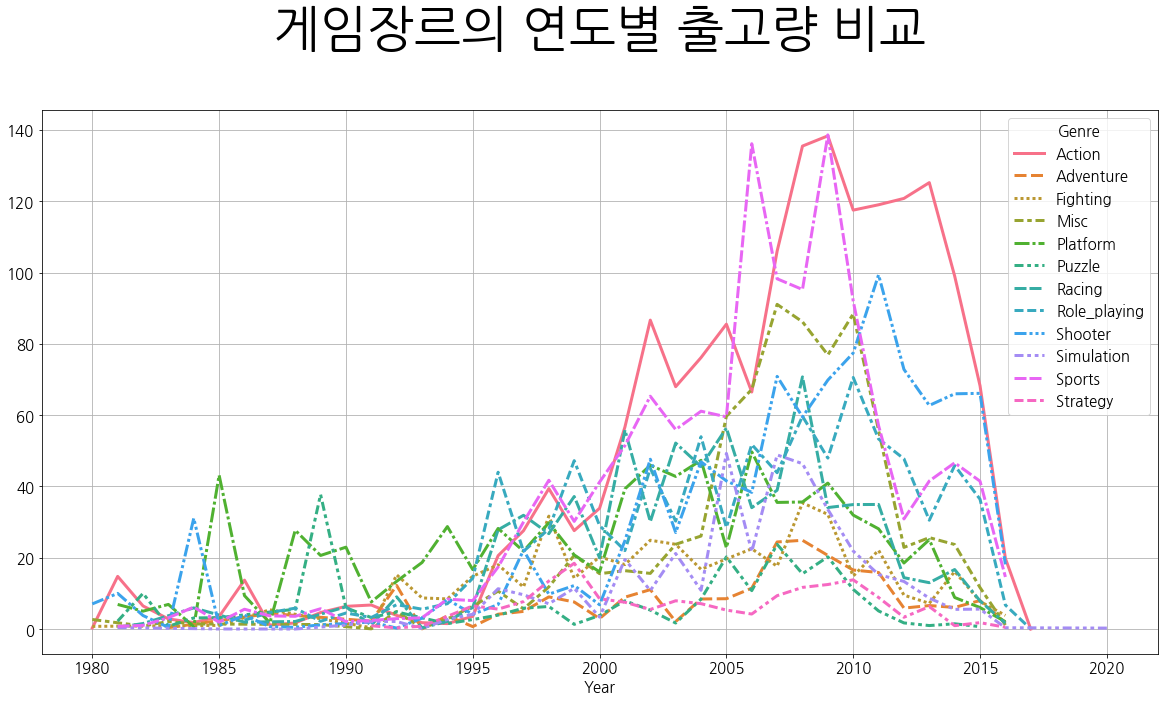

In [33]:
# 폰트설정
plt.rc('font', family='NanumGothic') 
plt.rc('axes', unicode_minus=False)

# 캔버스설정
plt.rcParams["figure.figsize"] = (20, 10)   ## 캔버스 사이즈 생성(가로/세로)
plt.rcParams['lines.linewidth'] = 3  # 라인두께
plt.rcParams['axes.grid'] = True # 차트내 격자선(grid) 표시 여부     # 지웟는데 안지워짐 이유는 모르겠움

# https://financedata.github.io/posts/faq_matplotlib_default_chart_size.html
# 타이틀
plt.title('게임장르의 연도별 출고량 비교\n', size=50, weight='bold')

# 주어진 그래프 그리기
sns.lineplot(data = Total_Yearly_Genre);

In [34]:
# 그래프를 보면, 액션과 스포츠는 2000년대 급성장을 하고, 플랫폼은 계속 꾸준히 인기있음을 확인.

In [35]:
# 1985년 플랫폼 게임 중 가장 출고량이 높은 것은?
Platform_df[Platform_df['Year'] == 1985]

Name Platform  Year     Genre Publisher  NA_Sales  \
74         Wrecking Crew      NES  1985  Platform  Nintendo      0.00   
3143       Balloon Fight      NES  1985  Platform  Nintendo      0.39   
4113   Super Mario Bros.      NES  1985  Platform  Nintendo     29.08   
13419        Ice Climber      NES  1985  Platform  Nintendo      0.46   

       EU_Sales  JP_Sales  Other_Sales  Total_Sales  
74         0.00      0.51         0.00         0.51  
3143       0.09      0.43         0.01         0.92  
4113       3.58      6.81         0.77        40.24  
13419      0.10      0.92         0.02         1.50

In [36]:
# 2000년대 가장 인기있던 장르는 액션과 스포츠!
# 해당 장르의 가장 인기있던 게임은?

Action_df_2000 = Action_df[(Action_df.Year >= 2000) & (Action_df.Year < 2010)]
Sports_df_2000 = Sports_df[(Sports_df.Year >= 2000) & (Sports_df.Year < 2010)]

### * 2000-2009 가장 인기있던 액션게임 

In [37]:
Action_df_2000.sort_values(by='Total_Sales', ascending=False).head(10)

Name Platform  Year   Genre  \
14355           Grand Theft Auto: San Andreas      PS2  2004  Action   
5226              Grand Theft Auto: Vice City      PS2  2002  Action   
9597                     Grand Theft Auto III      PS2  2001  Action   
4704     Pokemon HeartGold/Pokemon SoulSilver       DS  2009  Action   
13626                     Grand Theft Auto IV     X360  2008  Action   
16120                     Grand Theft Auto IV      PS3  2008  Action   
751    Grand Theft Auto: Liberty City Stories      PSP  2005  Action   
1021   The Legend of Zelda: Twilight Princess      Wii  2006  Action   
13266              Uncharted 2: Among Thieves      PS3  2009  Action   
8136      Metal Gear Solid 2: Sons of Liberty      PS2  2001  Action   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
14355          Take-Two Interactive      9.43      0.40      0.41   
5226           Take-Two Interactive      8.41      5.49      0.47   
9597           Take-Two Interactive      6.99      4.51      0.30   
4704                       Nintendo      4.40      2.77      3.96   
13626          Take-Two Interactive      6.76      3.10      0.14   
16120          Take-Two Interactive      4.76      3.76      0.44   
751            Take-Two Interactive      2.90      2.83      0.24   
1021                       Nintendo      3.83      2.19      0.60   
13266   Sony Computer Entertainment      3.27      2.25      0.21   
8136   Konami Digital Entertainment      2.45      2.01      0.87   

       Other_Sales  Total_Sales  
14355        10.57        20.81  
5226          1.78        16.15  
9597          1.30        13.10  
4704          0.77        11.90  
13626         1.03        11.03  
16120         1.62        10.58  
751           1.75         7.72  
1021          0.70         7.32  
13266         1.00         6.73  
8136          0.72         6.05

### * 2000-2009 가장 인기있던 스포츠게임 

In [38]:
Sports_df_2000.sort_values(by='Total_Sales', ascending=False).head(10)

Name Platform  Year   Genre  \
2855                                  Wii Sports      Wii  2006  Sports   
3288                           Wii Sports Resort      Wii  2009  Sports   
3367                                     Wii Fit      Wii  2007  Sports   
10681                               Wii Fit Plus      Wii  2009  Sports   
8314          Mario & Sonic at the Olympic Games      Wii  2007  Sports   
378           Mario & Sonic at the Olympic Games       DS  2008  Sports   
5079                               Madden NFL 06      PS2  2005  Sports   
7218                    Tony Hawk's Pro Skater 2       PS  2000  Sports   
10383  Mario & Sonic at the Olympic Winter Games      Wii  2009  Sports   
16234                            Madden NFL 2005      PS2  2004  Sports   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
2855          Nintendo     41.49     29.02      3.77         8.46        82.74  
3288          Nintendo     15.75     11.01      3.28         2.96        33.00  
3367          Nintendo      8.94      8.03      3.60         2.15        22.72  
10681         Nintendo      9.09      8.59      2.53         1.79        22.00  
8314              Sega      2.58      3.90      0.66         0.91         8.05  
378               Sega      1.64      2.48      0.44         0.58         5.14  
5079   Electronic Arts      3.98      0.26      0.01         0.66         4.91  
7218        Activision      3.05      1.41      0.02         0.20         4.68  
10383             Sega      1.89      1.99      0.22         0.48         4.58  
16234  Electronic Arts      4.18      0.26      0.01         0.08         4.53

In [39]:
# 2000년대 가장 인기있던 장르는 액션과 스포츠!
# 해당 장르의 가장 인기있던 게임은?

Action_df_2010 = Action_df[(Action_df.Year >= 2010)]
Shooter_df_2010 = Shooter_df[(Shooter_df.Year >= 2010)]
Sports_df_2010 = Sports_df[(Sports_df.Year >= 2010)]

### * 2010-2015 가장 인기있던 스포츠게임 

In [40]:
Sports_df_2010.sort_values(by='Total_Sales', ascending=False).head(10)

Name Platform  Year   Genre               Publisher  \
2587          FIFA 16      PS4  2015  Sports         Electronic Arts   
2671          FIFA 14      PS3  2013  Sports         Electronic Arts   
14471   Zumba Fitness      Wii  2010  Sports               505 Games   
13203         FIFA 12      PS3  2011  Sports         Electronic Arts   
3022          FIFA 15      PS4  2014  Sports         Electronic Arts   
5486    Kinect Sports     X360  2010  Sports  Microsoft Game Studios   
9993   FIFA Soccer 11      PS3  2010  Sports         Electronic Arts   
14154         FIFA 15      PS3  2014  Sports         Electronic Arts   
15144         FIFA 17      PS4  2016  Sports         Electronic Arts   
7708          FIFA 14     X360  2013  Sports         Electronic Arts   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
2587       1.11      6.06      0.06         1.26         8.49  
2671       0.78      4.32      0.07         1.73         6.90  
14471      3.50      2.64      0.00         0.67         6.81  
13203      0.84      4.32      0.11         1.42         6.69  
3022       0.79      4.29      0.05         1.47         6.60  
5486       3.92      1.78      0.03         0.51         6.24  
9993       0.60      3.29      0.06         1.13         5.08  
14154      0.57      3.14      0.04         1.07         4.82  
15144      0.28      3.75      0.06         0.69         4.78  
7708       0.92      2.93      0.01         0.46         4.32

### * 2010-2015 가장 인기있던 액션게임 5가지

In [41]:
Action_df_2010.sort_values(by='Total_Sales', ascending=False).head(5)

Name Platform  Year   Genre  \
3414               Grand Theft Auto V      PS3  2013  Action   
10695              Grand Theft Auto V     X360  2013  Action   
1973               Grand Theft Auto V      PS4  2014  Action   
8857                   FIFA Soccer 13      PS3  2012  Action   
11620  Uncharted 3: Drake's Deception      PS3  2011  Action   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
3414          Take-Two Interactive      7.01      9.27      0.97         4.14   
10695         Take-Two Interactive      9.63      5.31      0.06         1.38   
1973          Take-Two Interactive      3.80      5.81      0.36         2.02   
8857               Electronic Arts      1.06      5.05      0.13         2.01   
11620  Sony Computer Entertainment      2.77      2.80      0.19         1.06   

       Total_Sales  
3414         21.39  
10695        16.38  
1973         11.99  
8857          8.25  
11620         6.82

### * 2010-2015 가장 인기있던 총게임 5가지

In [42]:
Shooter_df_2010.sort_values(by='Total_Sales', ascending=False).head(5)

Name Platform  Year    Genre   Publisher  \
2757  Call of Duty: Modern Warfare 3     X360  2011  Shooter  Activision   
6119         Call of Duty: Black Ops     X360  2010  Shooter  Activision   
8892       Call of Duty: Black Ops 3      PS4  2015  Shooter  Activision   
4152      Call of Duty: Black Ops II      PS3  2012  Shooter  Activision   
6257      Call of Duty: Black Ops II     X360  2012  Shooter  Activision   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales  
2757      9.03      4.28      0.13         1.32        14.76  
6119      9.67      3.73      0.11         1.13        14.64  
8892      5.77      5.81      0.35         2.31        14.24  
4152      4.99      5.88      0.65         2.52        14.04  
6257      8.25      4.30      0.07         1.12        13.74

# 5. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [43]:
# Total 출고량 상위 30개 정렬
df.sort_values(by='Total_Sales', ascending=False).head(30)

Name Platform  Year  \
2855                                     Wii Sports      Wii  2006   
4113                              Super Mario Bros.      NES  1985   
12316                                Mario Kart Wii      Wii  2008   
3288                              Wii Sports Resort      Wii  2009   
7673                       Pokemon Red/Pokemon Blue       GB  1996   
1187                                         Tetris       GB  1989   
6796                          New Super Mario Bros.       DS  2006   
2959                                       Wii Play      Wii  2006   
16176                     New Super Mario Bros. Wii      Wii  2009   
10280                                     Duck Hunt      NES  1984   
10914                                    Nintendogs       DS  2005   
10438                                 Mario Kart DS       DS  2005   
9233                    Pokemon Gold/Pokemon Silver       GB  1999   
3367                                        Wii Fit      Wii  2007   
10681                                  Wii Fit Plus      Wii  2009   
4253                             Kinect Adventures!     X360  2010   
3414                             Grand Theft Auto V      PS3  2013   
14355                 Grand Theft Auto: San Andreas      PS2  2004   
12837                             Super Mario World     SNES  1990   
12950  Brain Age: Train Your Brain in Minutes a Day       DS  2005   
10345                 Pokemon Diamond/Pokemon Pearl       DS  2006   
9307                               Super Mario Land       GB  1989   
14540                           Super Mario Bros. 3      NES  1988   
10695                            Grand Theft Auto V     X360  2013   
5226                    Grand Theft Auto: Vice City      PS2  2002   
10698                 Pokemon Ruby/Pokemon Sapphire      GBA  2002   
10410                   Pokemon Black/Pokemon White       DS  2010   
503     Brain Age 2: More Training in Minutes a Day       DS  2005   
992                          Gran Turismo 3: A-Spec      PS2  2001   
2757                 Call of Duty: Modern Warfare 3     X360  2011   

              Genre                    Publisher  NA_Sales  EU_Sales  \
2855         Sports                     Nintendo     41.49     29.02   
4113       Platform                     Nintendo     29.08      3.58   
12316        Racing                     Nintendo     15.85     12.88   
3288         Sports                     Nintendo     15.75     11.01   
7673   Role_playing                     Nintendo     11.27      8.89   
1187         Puzzle                     Nintendo     23.20      2.26   
6796       Platform                     Nintendo     11.38      9.23   
2959           Misc                     Nintendo     14.03      9.20   
16176      Platform                     Nintendo     14.59      7.06   
10280       Shooter                     Nintendo     26.93      0.63   
10914    Simulation                     Nintendo      9.07     11.00   
10438        Racing                     Nintendo      9.81      7.57   
9233   Role_playing                     Nintendo      9.00      6.18   
3367         Sports                     Nintendo      8.94      8.03   
10681        Sports                     Nintendo      9.09      8.59   
4253           Misc       Microsoft Game Studios     14.97      4.94   
3414         Action         Take-Two Interactive      7.01      9.27   
14355        Action         Take-Two Interactive      9.43      0.40   
12837      Platform                     Nintendo     12.78      3.75   
12950          Misc                     Nintendo      4.75      9.26   
10345  Role_playing                     Nintendo      6.42      4.52   
9307       Platform                     Nintendo     10.83      2.71   
14540      Platform                     Nintendo      9.54      3.44   
10695        Action         Take-Two Interactive      9.63      5.31   
5226         Action         Take-Two Interactive      8.41      5.49   
1069

In [44]:
df_by_name_3 = df.groupby('Name').Total_Sales.sum()

In [45]:
# 퍼블리셔별 출고량 그래프
# 멀티플랫폼출시, 리마스터 등 동일한 게임이름의 데이터를 하나의 이름으로 그룹화.

title_df = df.groupby('Name', as_index=False).sum()
title_df

Name  Year  NA_Sales  EU_Sales  \
0                                  '98 Koshien  1998      0.15      0.10   
1                   .hack//G.U. Vol.1//Rebirth  2006      0.00      0.00   
2                 .hack//G.U. Vol.2//Reminisce  2006      0.11      0.09   
3      .hack//G.U. Vol.2//Reminisce (jp sales)  2006      0.00      0.00   
4                .hack//G.U. Vol.3//Redemption  2007      0.00      0.00   
...                                        ...   ...       ...       ...   
11290                       thinkSMART FAMILY!  2010      0.03      0.00   
11291               thinkSMART: Chess for Kids  2011      0.01      0.00   
11292                             uDraw Studio  2010      1.67      0.58   
11293             uDraw Studio: Instant Artist  4022      0.09      0.10   
11294             ¡Shin Chan Flipa en colores!  2007      0.00      0.00   

       JP_Sales  Other_Sales  Total_Sales  
0          0.12         0.03         0.40  
1          0.17         0.00         0.17  
2          0.00         0.03         0.23  
3          0.16         0.00         0.16  
4          0.17         0.00         0.17  
...         ...          ...          ...  
11290      0.00         0.00         0.03  
11291      0.00         0.00         0.01  
11292      0.00         0.20         2.45  
11293      0.00         0.02         0.21  
11294      0.14         0.00         0.14  

[11295 rows x 7 columns]

In [46]:
title_df = title_df.sort_values(by='Total_Sales',ascending=False).head(30)
name_df=df.loc[:,['Name','Publisher']]
title_df=pd.merge(title_df,name_df,how='left',on='Name').drop_duplicates().reset_index(drop=True)

In [47]:
publisher_count=title_df['Publisher'].value_counts()
publisher_count

Nintendo                              18
Activision                             7
Take-Two Interactive                   3
Microsoft Game Studios                 2
Sony Computer Entertainment Europe     1
Sony Computer Entertainment            1
Name: Publisher, dtype: int64

<BarContainer object of 6 artists>

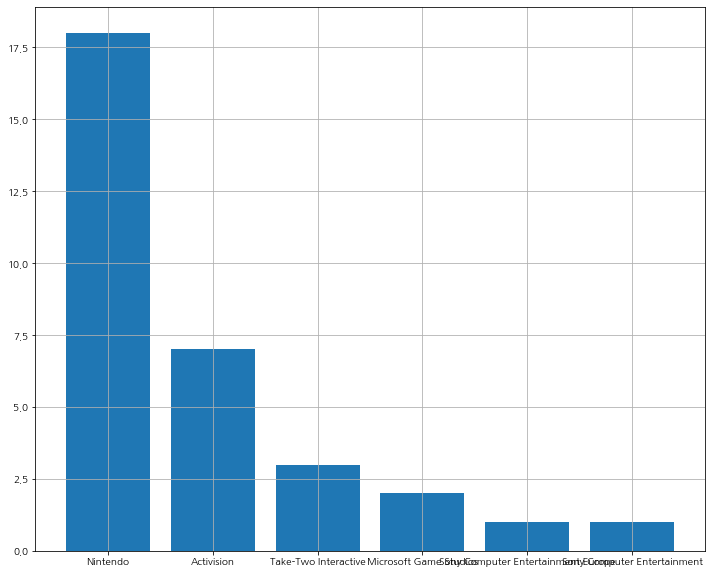

In [48]:
plt.figure(figsize=(12,10))
plt.rcParams['font.size'] = 10

plt.bar(publisher_count.index,publisher_count)

### 출고량이 높은 퍼블리셔에 대한 분석 및 시각화

데이터의 게임이름이 중복으로 돼있는 경우가 있어 확인했을 때, 같은 게임을 여러 플랫폼을 이용하는 경우가 있었다.  
데이터의 이름으로 그룹화하여 게임 하나당 총 판매량을 구하고, 판매량 상위 30개의 퍼블리셔를 확인했을 때, Nintendo개 18개로 가장 많았고,   
Acticision이 7개, Take-Two Interactive이 3개로 확인하였다. 

# 7. 결론

### 프로젝트 주제인 다음 분기에 설계해야할 게임에 대해 분석 

비디오게임 전체시장을 봤을 때, 출고량이 높은 상위 3개의 장르는 Action, Shooter, Sports로 일본시장이 목표가 아닌 이상 세 장르 중 하나를 택하여 개발하는 것이 필요하다.  
상위 30개 게임종류를 확인시 가장 많은 게임을 발매한 회사는 닌텐도이고, 다수의 히트작 제작경험, wii 등 안정적인 플랫폼을 보유하고 있는 회사도 닌텐도이다.  이에 비디오게임 개발 시, 닌텐도사와의 협업을 진행하는 것이 필요하다.  
2020년에 급격한 성장률을 보였기에 비디오게임에 대한 분석을 시작하였으나, 비디오게임은 코로나시국에 실내에서 즐기기 위한 산업으로 급성장했다고도 볼 수 있다. 
인간의 생활환경 변화에 따라 시장이 민감하게 변화했다고 볼 수 있기에, 비디오게임 개발 시, 앞으로의 생활패턴을 생각하여 개발에 신중할 필요가 있다